In [1]:

from tensorly import tt_to_tensor
import tensorly.decomposition as tl_decomp
import tensorly.tenalg as tl_alg
import numpy as np
import matplotlib.pyplot as plt


In [2]:

# Generate a random 4-dimensional tensor
shape = (5, 4)
tensor = np.random.rand(*shape)

# Perform tensor decomposition using Tucker decomposition
rank = (2, 2)  # Desired ranks for each mode
core, factors = tl_decomp.tucker(tensor, rank)

# Reconstruct the original tensor using the decomposition
# reconstructed_tensor = tl_alg.tt_tensor(factors)

# Calculate the reconstruction error
# reconstruction_error = np.linalg.norm(tensor - reconstructed_tensor)


print("Original Tensor Shape:", shape)
print("Decomposed Core Shape:", core.shape)
print("Decomposed Factors Shapes:", [factor.shape for factor in factors])
# print("Reconstruction Error:", reconstruction_error)
print( tensor.size)
print( core.size)

print(tensor)
print(core)

print(factors)
      


Original Tensor Shape: (5, 4)
Decomposed Core Shape: (2, 2)
Decomposed Factors Shapes: [(5, 2), (4, 2)]
20
4
[[0.32685321 0.50275762 0.11050916 0.79031595]
 [0.80153692 0.79428742 0.96522705 0.51314961]
 [0.04180347 0.7793978  0.84462062 0.69527489]
 [0.39791529 0.37781967 0.26084119 0.69003335]
 [0.35337048 0.52536094 0.41224807 0.0025028 ]]
[[ 2.40837021e+00  1.44312823e-16]
 [-1.84313355e-16  7.38278327e-01]]
[array([[ 0.35843646,  0.64679415],
       [ 0.63205662, -0.43837102],
       [ 0.52434929,  0.03430377],
       [ 0.35237289,  0.42592126],
       [ 0.27003499, -0.45486537]]), array([[ 0.36594432, -0.17579442],
       [ 0.56715417, -0.10067027],
       [ 0.53804006, -0.54057766],
       [ 0.50490968,  0.81654003]])]


In [6]:
test_file = np.load('/home/fun/wildfire_data/Sheep_Fire_2020-08-22/MOD13Q1_2022-07-28.npy')
print(test_file.shape)
test_file1 = np.load('/home/fun/wildfire_data/Sheep_Fire_2020-08-22/MOD13Q1_2022-07-28.npy')

(2, 50, 50)


Original Tensor Shape: (2, 50, 50)
Original Tensor Shape: (1, 50, 50)
Restored Tensor Shape: (2, 50, 50)
Reconstruction Error: 17819.92424852708
original tensor [[5555. 5803. 6524. 5747.]
 [5803. 5611. 7437. 6416.]]
restored_tensor [[5501.852127   5778.53063955 6397.53262355 5576.80173897]
 [5778.53063955 5507.37979591 7196.71180317 6225.64693129]]
error_matrix Error: [[ 53.147873    24.46936045 126.46737645 170.19826103]
 [ 24.46936045 103.62020409 240.28819683 190.35306871]]


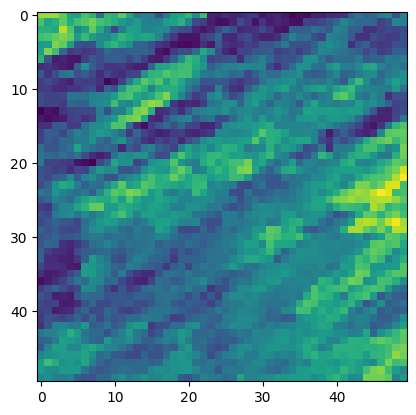

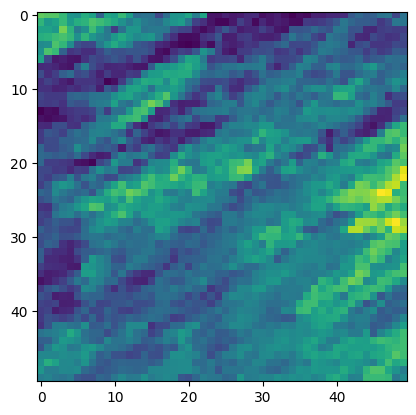

In [11]:


# Generate a random 3-dimensional tensor
shape = test_file.shape
tensor = test_file

# Perform tensor decomposition using Tucker decomposition
rank = (1,50, 50)  # Desired ranks for each mode
core, factors = tl_decomp.tucker(tensor, rank)

# Restore the full tensor from the decomposed core and factor matrices
restored_tensor = tl_alg.multi_mode_dot(core, factors)

# Calculate the reconstruction error
reconstruction_error = np.linalg.norm(tensor - restored_tensor)
error_matrix = tensor - restored_tensor

print("Original Tensor Shape:", shape)
print("Original Tensor Shape:", core.shape)
print("Restored Tensor Shape:", restored_tensor.shape)
print("Reconstruction Error:", reconstruction_error)

print("original tensor", tensor[0,1:3,1:5])
# print("core", core)

# print ("factors", factors)

print ("restored_tensor", restored_tensor[0, 1:3,1:5])

print("error_matrix Error:", error_matrix[0, 1:3,1:5])

img = plt.imshow(tensor[0])
plt.show()

# print(core)
# core[0][0]=0
# plt.imshow(core)
# plt.colorbar()
# plt.show()

img = plt.imshow(restored_tensor[0])
plt.show()

    
    

In [58]:
import tensorly.decomposition as tl_decomp
import tensorly.tenalg as tl_alg
import numpy as np

# Generate a random 3-dimensional tensor
shape = (100, 10, 5)
tensor = np.random.rand(*shape)

# Perform tensor decomposition using Tucker decomposition
rank = (90, 8, 4)  # Desired ranks for each mode
core, factors = tl_decomp.tucker(tensor, rank)

# Restore the full tensor from the decomposed core and factor matrices
restored_tensor = tl_alg.multi_mode_dot(core, factors)

# Calculate the reconstruction error
reconstruction_error = np.linalg.norm(tensor - restored_tensor)
error_matrix = tensor - restored_tensor

print("Original Tensor Shape:", shape)
print("Restored Tensor Shape:", restored_tensor.shape)
print("Reconstruction Error:", reconstruction_error)

print("original tensor", tensor[1:3,1:5,1:2])
# print("core", core)

# print ("factors", factors)

print ("restored_tensor", restored_tensor[1:3,1:5,1:2])

print("error_matrix Error:", error_matrix[1:3,1:5,1:2])

Original Tensor Shape: (100, 10, 5)
Restored Tensor Shape: (100, 10, 5)
Reconstruction Error: 11.306493750649315
original tensor [[[0.09646863]
  [0.31391874]
  [0.64089346]
  [0.5968091 ]]

 [[0.02789627]
  [0.92568609]
  [0.42401758]
  [0.21048283]]]
restored_tensor [[[0.24135265]
  [0.27758642]
  [0.79994421]
  [0.45902489]]

 [[0.22021232]
  [0.86259109]
  [0.65250408]
  [0.17207711]]]
error_matrix Error: [[[-0.14488402]
  [ 0.03633232]
  [-0.15905075]
  [ 0.13778421]]

 [[-0.19231605]
  [ 0.063095  ]
  [-0.22848651]
  [ 0.03840572]]]


In [15]:
import numpy as np

# Define the dimensions of the tensor
sample = 10
frame = 20
channel = 3
w = 50
h = 50

# Generate a random 5-dimensional tensor
input_data = np.random.rand(sample, frame, channel, w, h)

# Print the shape of the tensor
print("Tensor Shape:", tensor.shape)



Tensor Shape: (10, 20, 3, 50, 50)


In [19]:

def DWT(image):
    DWT_output = np.empty([image.shape[0], image.shape[1], 4])
    coeffs = pywt.dwt2(image, 'bior1.3')
    LL, (LH, HL, HH) = coeffs
    
    DWT_output = np.dstack((DWT_output, LL))
    DWT_output = np.dstack((DWT_output, LH))
    DWT_output = np.dstack((DWT_output, HL))
    DWT_output = np.dstack((DWT_output, HH))
    return DWT_output 

In [24]:
shape_DWT = (sample, frame, channel*4, int(w/2), int(h/2))
DWT_data = np.empty(shape_DWT)
for i in range(sample):
    for j in range(frame):
        for k in range(channel):
            DWT_output = input_data[i,j,k,:,:]
            DWT_data


